<a href="https://colab.research.google.com/github/Archita-cloud/data/blob/main/A4_Archita_Banerjee_2_year_M_Tech_Regularization_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADVANCED MACHINE LEARNING**

**Lab Assignment-4 On Regularization using Handwritten Digit Classification**

NAME: *ARCHITA BANERJEE*

ROLL NUMBER: *20DS0110004*

*M.Tech 2 YEARS IN DATA SCIENCE*



In [ ]:
# Regularization

In [ ]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
digit_mnist = tf.keras.datasets.mnist

In [ ]:
(train_images,train_labels), (test_images,test_labels) = digit_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
print(len(train_images),len(test_images))

60000 10000


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']

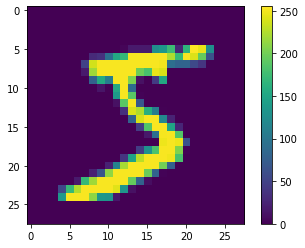

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

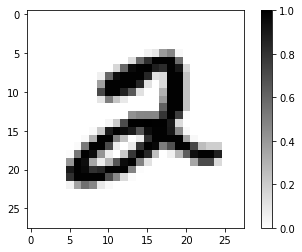

In [ ]:
plt.figure()
plt.imshow(train_images[5], cmap = plt.cm.binary)
plt.colorbar()

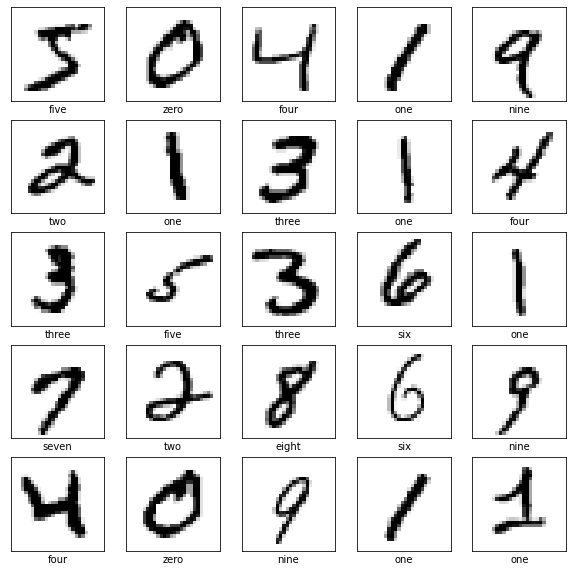

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(  class_names[ train_labels[i] ]  )
  

plt.show()

In [ ]:

 
 # Without Regularization

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input features = 784
    tf.keras.layers.Dense(128, activation='relu'), # neurons = 128
    tf.keras.layers.Dense(10)    # 10 class classification
])


In [ ]:

# With L2 Regularization

from tensorflow.keras import regularizers


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.01) ), #lamba(regularization parameter)=0.01
    tf.keras.layers.Dense(10)    
])


In [ ]:

# With L1 Regularization

from tensorflow.keras import regularizers



model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.0001) ), #lamba(regularization parameter)=0.0001
    tf.keras.layers.Dense(10) 
])


In [ ]:

# Dropout


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input features = 784
    tf.keras.layers.Dense(128, activation='relu'), # neurons = 128
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10)    # 10 class classification
])


In [ ]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']        
)

In [ ]:
model.fit(train_images,train_labels,epochs= 100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6622 - accuracy: 0.8727
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2883 - accuracy: 0.9579
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9655
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2183 - accuracy: 0.9719
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2037 - accuracy: 0.9749
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1937 - accuracy: 0.9756
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1850 - accuracy: 0.9769
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1795 - accuracy: 0.9782
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1743 - accuracy: 0.9793
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=0)

In [ ]:
print(test_acc)

0.9753000140190125


In [ ]:
# Without Regularization
#Training accuracy = 0.9993
#Testing accuracy = 0.9810
# There is some variation, so my model may suffer from overfitting issues. Therefore, we should try on regularisation.

# With L2 Regularization
#Training accuracy = 0.9607
#Testing accuracy = 0.9613

# With L1 Regularization
#Training accuracy = 0.9874
#Testing accuracy = 0.9753

# With Dropout Regularization
#Training accuracy = 0.9957
#Testing accuracy = 0.9810



In [ ]:
#softmax--------->
#model
prob_model=tf.keras.Sequential([model,
                                tf.keras.layers.Softmax()
                                ])

In [ ]:
predictions=prob_model.predict(test_images)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
np.argmax(predictions[0])

7

Text(0.5, 0, 'seven')

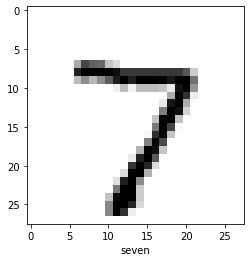

In [ ]:

plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names [ np.argmax(predictions[0])  ])


In [ ]:
'''
model.compile(optimizer = 'sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']        
)
'''

In [ ]:
#model.fit(train_images,train_labels,epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0109 - accuracy: 0.9972
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0062 - accuracy: 0.9990
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0055 - accuracy: 0.9991
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0052 - accuracy: 0.9995
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0048 - accuracy: 0.9992
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0045 - accuracy: 0.9994
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0044 - accuracy: 0.9996
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9997
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.004

In [ ]:
#test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=0)

In [ ]:
#print(test_acc)

0.9818999767303467


In [ ]:
# My model accuracy is 98.18% based on the test data I have used

In [ ]:
'''
#softmax--------->
#model
prob_model=tf.keras.Sequential([model,
                                tf.keras.layers.Softmax()
                                ])
                                '''

In [ ]:
#predictions=prob_model.predict(test_images)

In [ ]:
#predictions.shape

(10000, 10)

In [ ]:
#np.argmax(predictions[0])

7

Text(0.5, 0, 'seven')

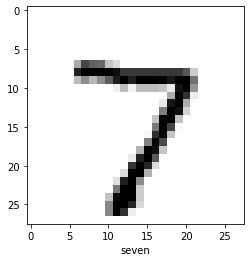

In [ ]:
'''
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names [ np.argmax(predictions[0])  ])
'''

In [ ]:
#model.compile(optimizer = 'rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']        
)

In [ ]:
#model.fit(train_images,train_labels,epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0080 - accuracy: 0.9977
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0063 - accuracy: 0.9983
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 0.9983
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0035 - accuracy: 0.9991
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.003

In [ ]:
#test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=0)

In [ ]:
#print(test_acc)

0.9814000129699707


In [ ]:
# My model accuracy is 98.14 % based on the test data I have used

In [ ]:
'''
#softmax--------->
#model
prob_model=tf.keras.Sequential([model,
                                tf.keras.layers.Softmax()
                                ])
                                ''''

In [ ]:
#predictions=prob_model.predict(test_images)

In [ ]:
#predictions.shape

(10000, 10)

In [ ]:
#np.argmax(predictions[0])

7

Text(0.5, 0, 'seven')

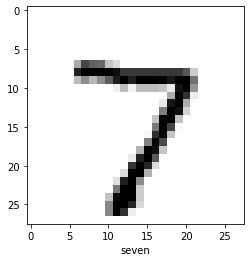

In [ ]:
'''
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.xlabel(class_names [ np.argmax(predictions[0])  ])
'''

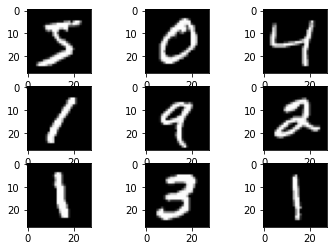

In [ ]:
# Data augmentation
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [ ]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

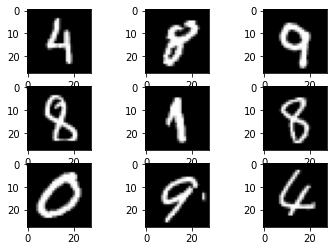

In [ ]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


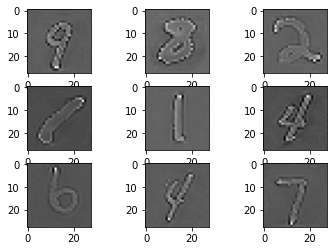

In [ ]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

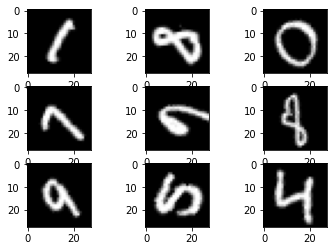

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break


In [ ]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

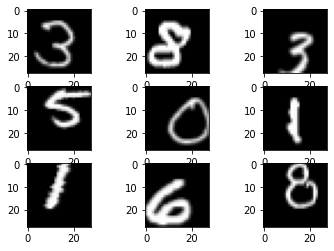

In [ ]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)

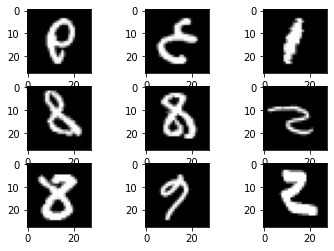

In [ ]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break
